In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Load Data
First we will load the training data and testing data

In [7]:
train_file_path = r'data\Blood_samples_dataset_balanced_2(f).csv'
test_file_path = r'data\blood_samples_dataset_test.csv'

train_data = pd.read_csv(train_file_path)

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values 

train_data.head()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [8]:
test_data = pd.read_csv(test_file_path)
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
test_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
3,0.677636,0.435037,0.572571,0.965847,0.010580,0.753719,0.262138,0.789804,0.541149,0.550569,...,0.196416,0.141203,0.355437,0.468168,0.493548,0.213971,0.059427,0.836447,0.231356,Diabetes
4,0.105103,0.177558,0.169041,0.679138,0.886839,0.714977,0.197501,0.778653,0.319864,0.285914,...,0.259719,0.305473,0.867800,0.213141,0.094877,0.120487,0.211855,0.376829,0.645990,Diabetes


# Parameters optimization
We will look for the kernel and C value that brings the best accuracy

In [5]:
def create_svm(kernel='linear', C=1.0, random_state=42):
    # Create SVM classifier
    # You can change the kernel here
    svm = SVC(kernel=kernel, C=C, random_state=random_state)

    # Train the model
    svm.fit(X_train, y_train)

    # Predict the test set results
    return svm.predict(X_test)


In [9]:
best_settings = {'kernel': 'linear', 'C': 0.01, 'acc': 0}
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    c = 0.001
    while c <= 10000:
        y_pred = create_svm(kernel=kernel, C=c)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_settings['acc']:
            best_settings['acc'] = accuracy
            best_settings['C'] = c
            best_settings['kernel'] = kernel
        c *=10

Afterwards we will recalcualte the predicition using the best parameters we found

In [11]:
y_pred = create_svm(kernel=best_settings['kernel'], C=best_settings['C'])
print('Best settings:')
for setting in best_settings:
    try:
        print(f'{setting}: {best_settings[setting] * 100:.2f}%')
    except:
        print(f'{setting}: {best_settings[setting]}')

Best settings:
kernel: rbf
C: 10.00%
acc: 51.68%


# Findings
We will put our findings in a graph to better visualize the results

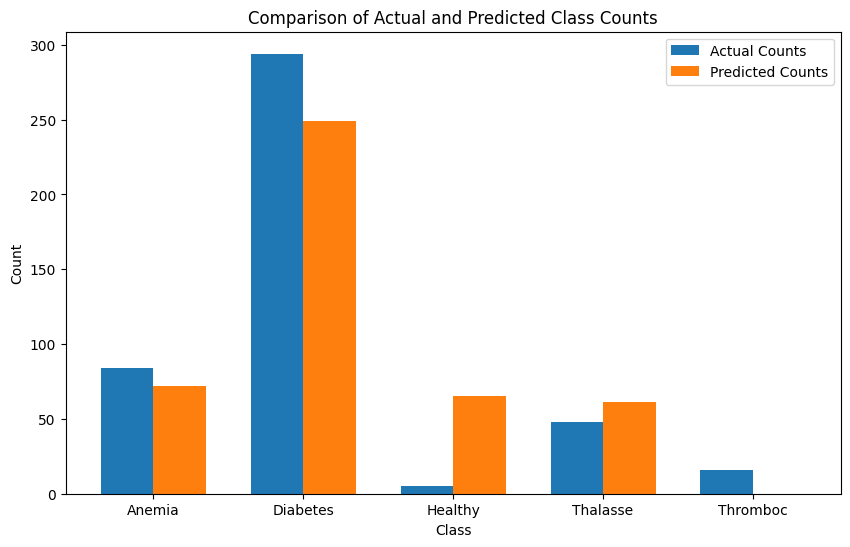

In [12]:
# Get all unique classes from both actual and predicted
all_classes = np.unique(np.concatenate((y_test, y_pred)))

# Calculate prediction counts
true_counts = pd.Series(y_test).value_counts().reindex(
    all_classes, fill_value=0).sort_index()
pred_counts = pd.Series(y_pred).value_counts().reindex(
    all_classes, fill_value=0).sort_index()

# Bar chart for actual vs predicted
plt.figure(figsize=(10, 6))
index = np.arange(len(true_counts))
bar_width = 0.35

plt.bar(index, true_counts, bar_width, label='Actual Counts')
plt.bar(index + bar_width, pred_counts, bar_width, label='Predicted Counts')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Class Counts')
# Adjust the labels to the center of grouped bars
plt.xticks(index + bar_width / 2, [str(cls) for cls in all_classes])
plt.legend()
plt.show()


# Conclusion
Using SVM we managed to reach over 50% prediction accuracy, the model can guess pretty well certain diseases, however there are some false positives healthy assestments.

Maybe this model could be used to diagonose specific diseases, but be taken with a grain of salt when it thinks someone is healthy.

Perhaps the parameters optimization caused overfitting, which caused these results.